### *Importing & Loading what we need* 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv("DataSet/StudentPerformanceFactors.csv")

In [2]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### *Data Preprocessing*

In [3]:
print("\nShape of the dataset:", data.shape)


Shape of the dataset: (6607, 20)


In [4]:
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence            

In [5]:
print("\nMissing values in each column:")
data.isnull().sum()


Missing values in each column:


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [6]:
print(f'Missing data percentage: {100 - (data.shape[0]-data.isna().sum().sum())/data.shape[0]*100:.2f}%')

Missing data percentage: 3.56%


* % of Missing Data is small so we can drop it.

In [7]:
data.dropna(axis=0,inplace=True)

In [8]:
print("\nStatistical Summary:")
data.describe()


Statistical Summary:


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


In [9]:
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:", len(numerical_cols))

Numerical Columns: 7


In [10]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", len(categorical_cols))

Categorical Columns: 13


### *EDA & Data Visualisation* 

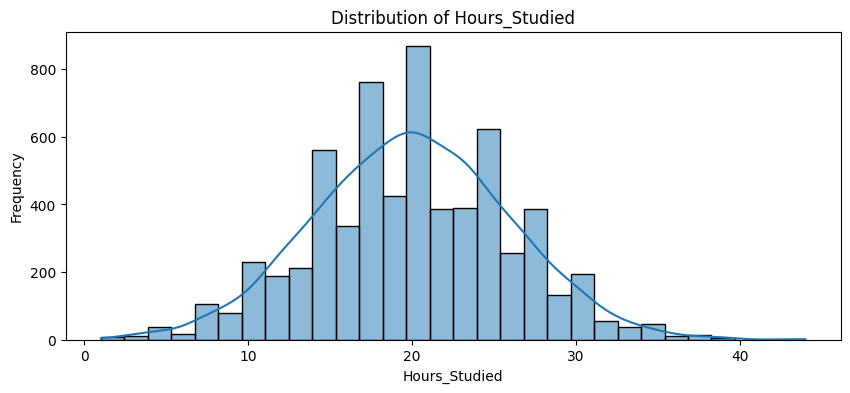

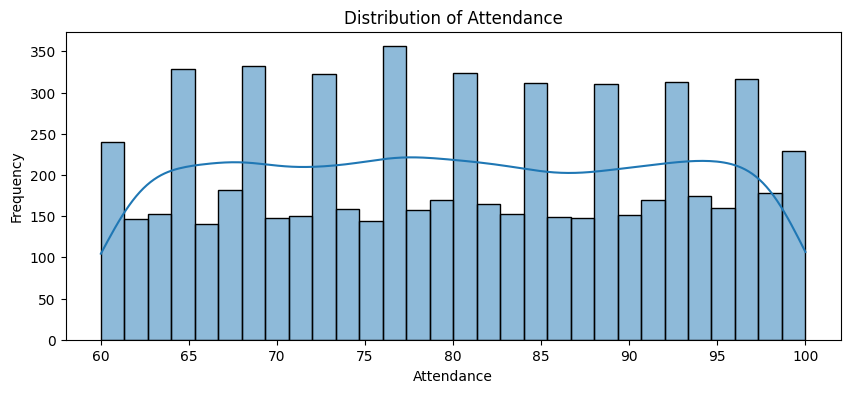

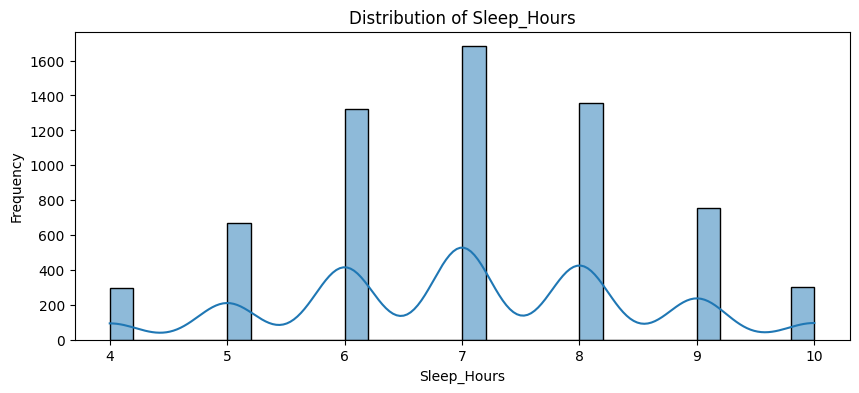

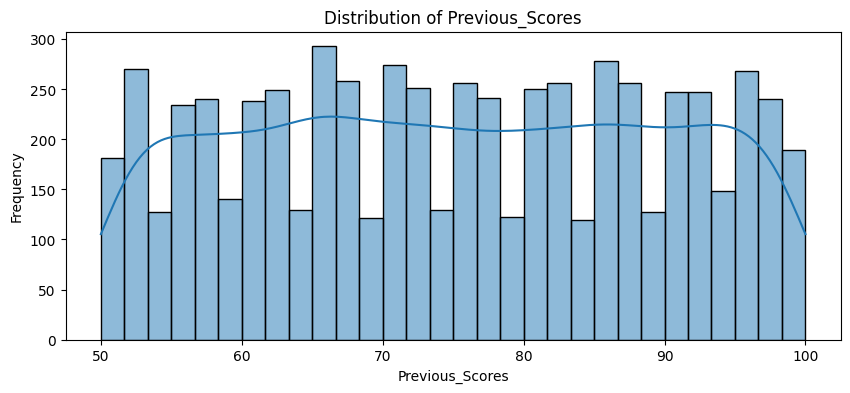

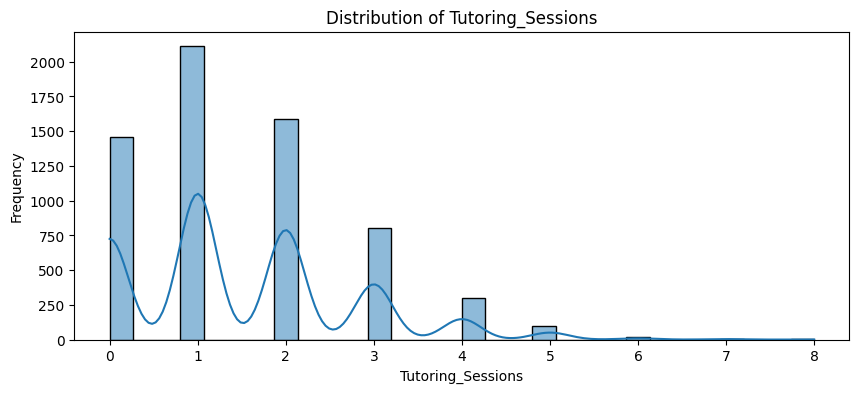

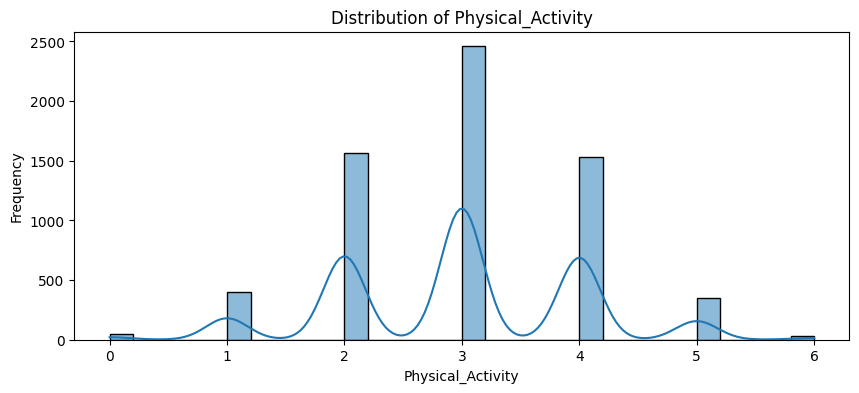

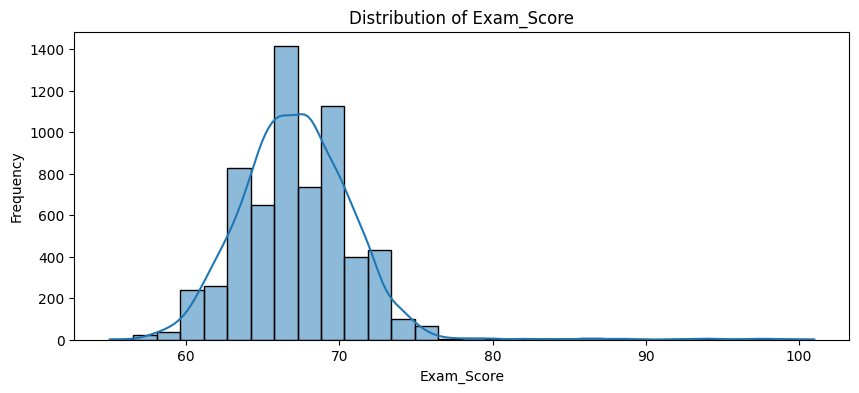

In [11]:
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

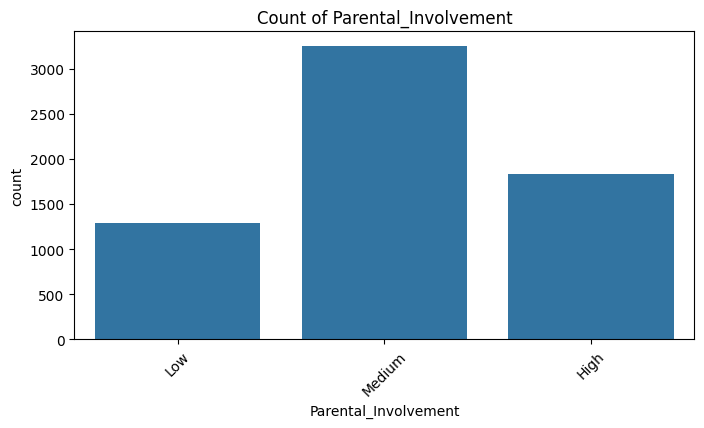

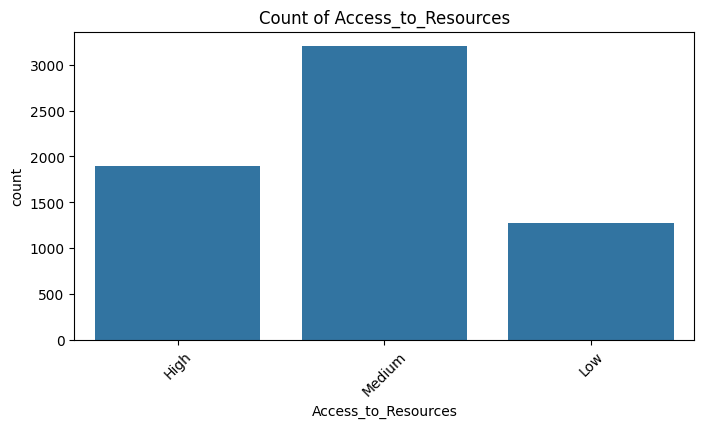

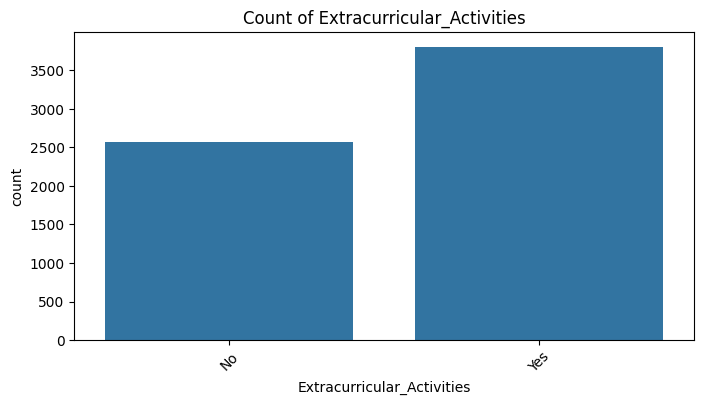

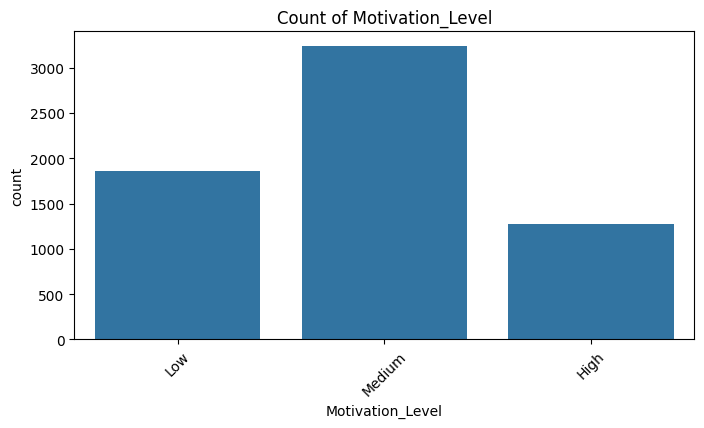

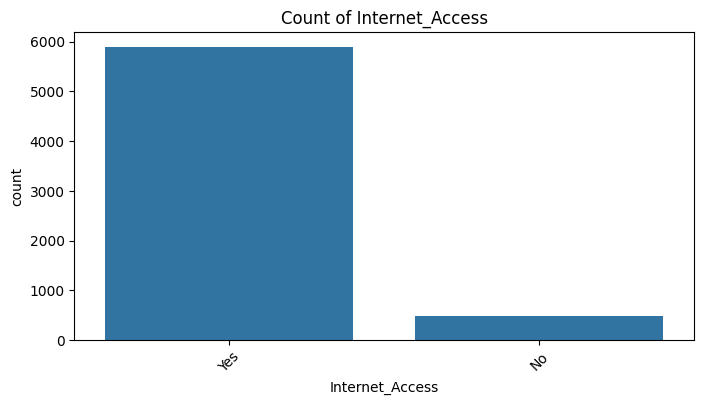

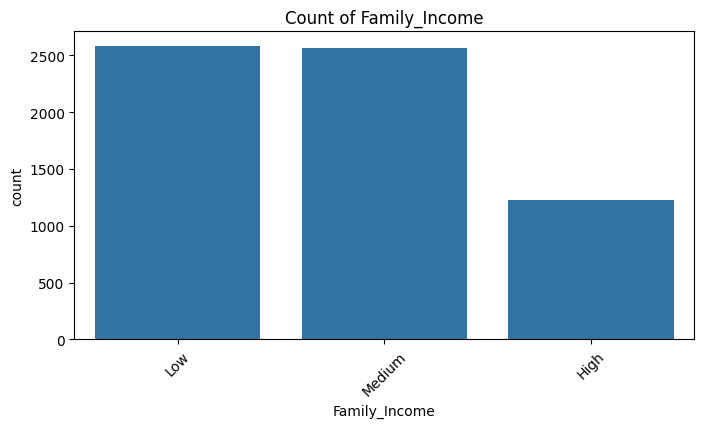

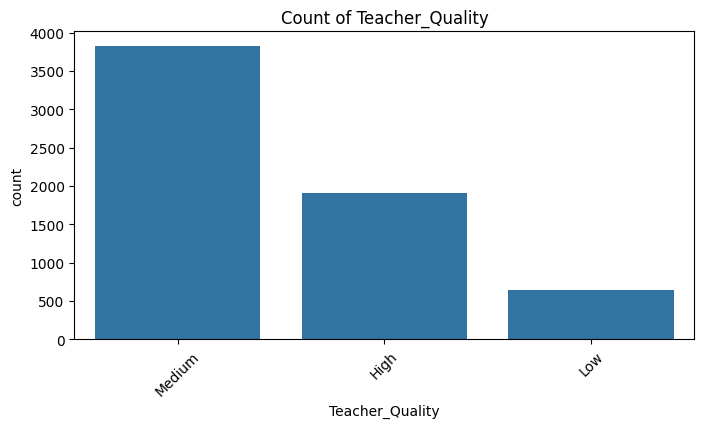

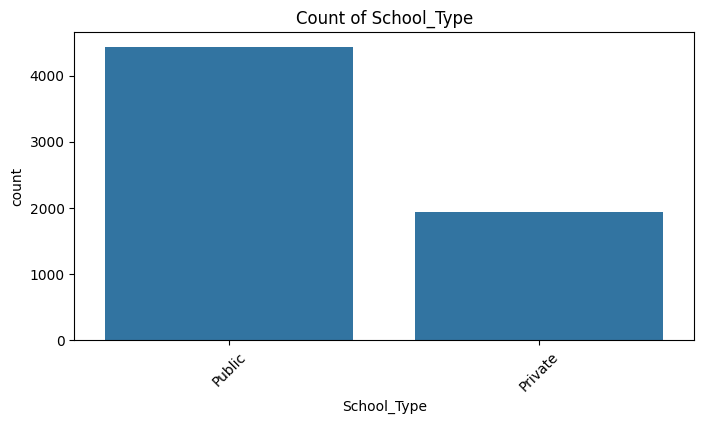

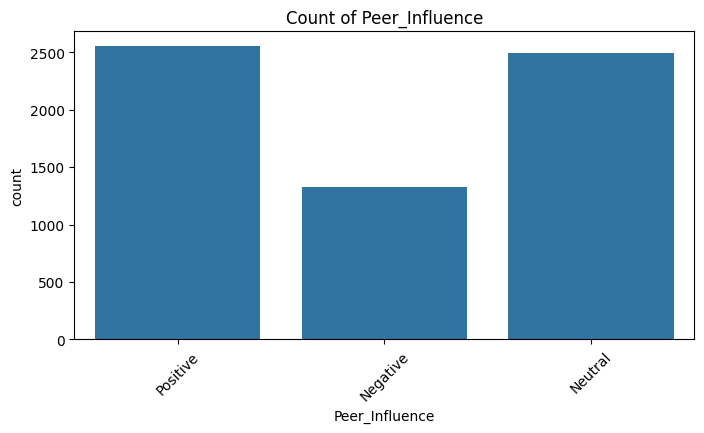

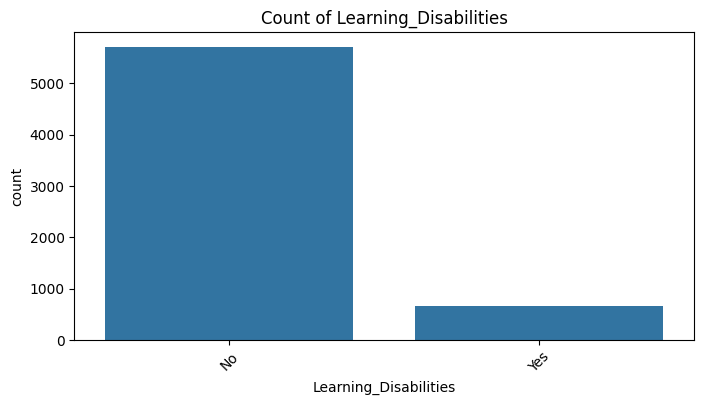

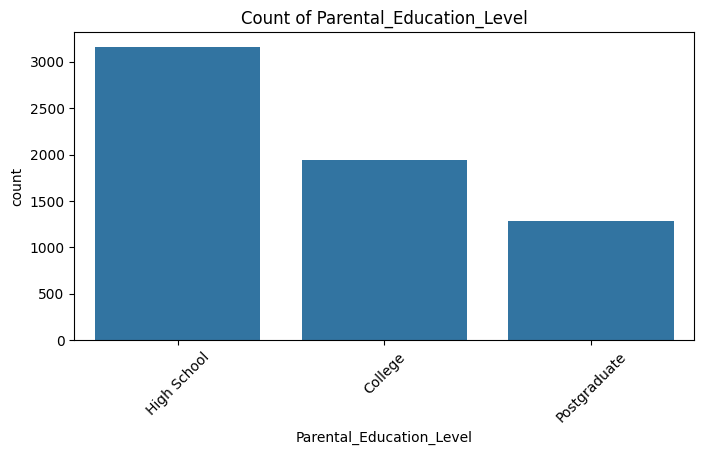

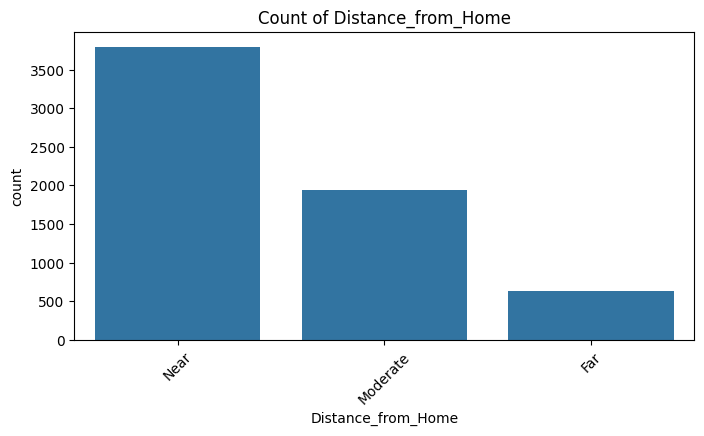

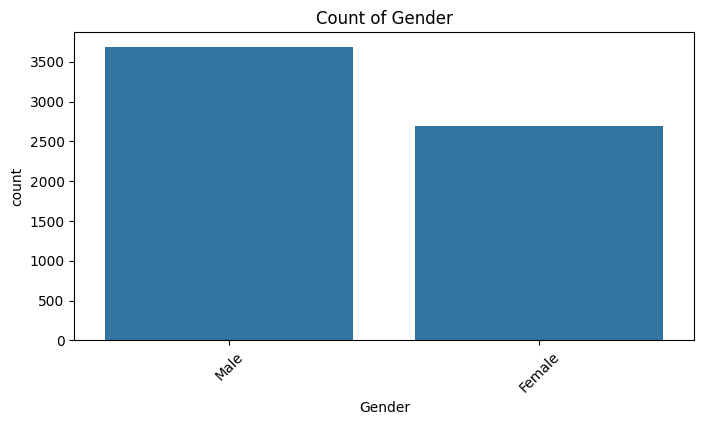

In [12]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

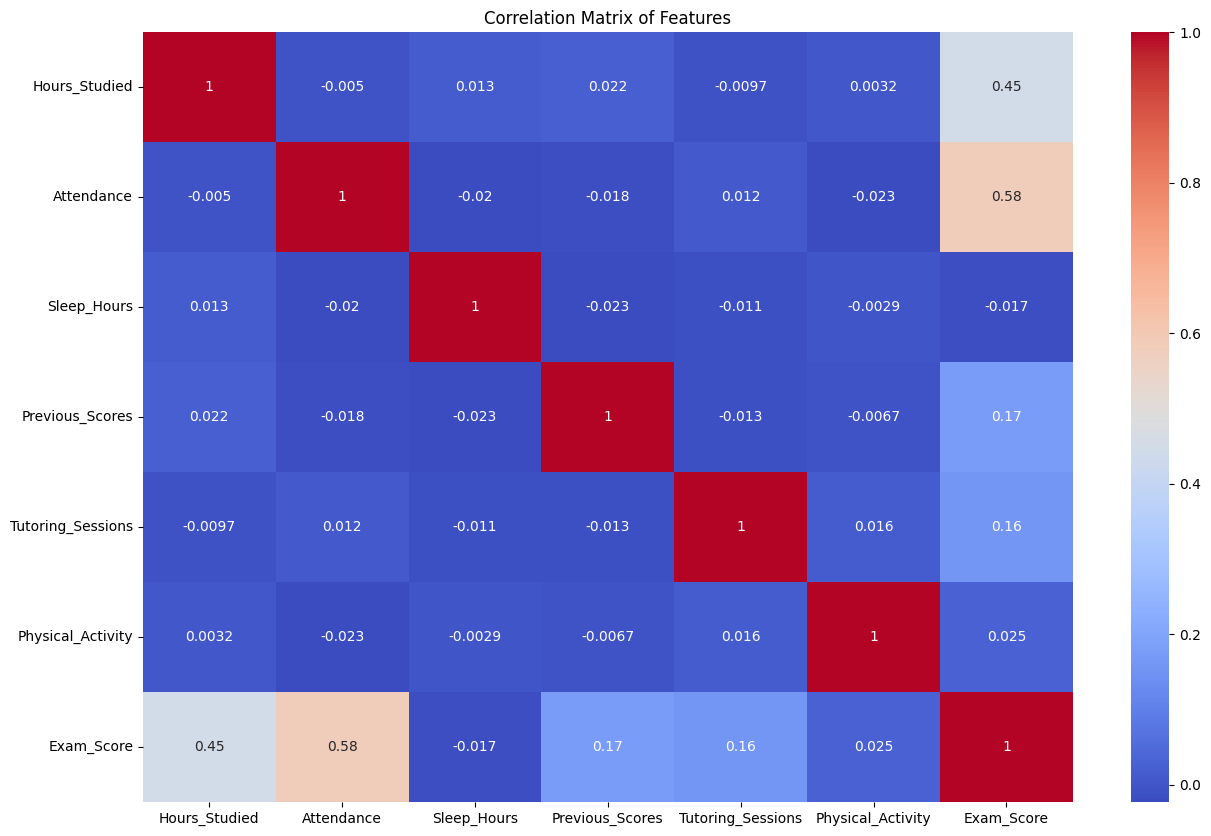

In [13]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

* **Insight from the Heatmap:**
    * Most impactful factors for exam performance here: *Attendance* and *Hours Studied.*
    * Secondary contributors: *Previous Scores*, *Tutoring Sessions.*


### *Check & Removing outliers identified using IQR*

In [14]:
Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = ((data[numerical_cols] < (Q1 - 1.5 * IQR)) | (data[numerical_cols] > (Q3 + 1.5 * IQR)))
outliers_iqr = outlier_condition.any(axis=1)
print(f'Number of outlier rows using IQR: {np.sum(outliers_iqr)}')

Number of outlier rows using IQR: 542


In [15]:
data_cleaned = data[~outliers_iqr] 

### *ANOVA test*

In [17]:
for col in categorical_cols:
    groups = [data_cleaned[data_cleaned[col] == cat]['Exam_Score'] for cat in data_cleaned[col].unique()]
    f_stat, p_val = stats.f_oneway(*groups)
    print(f"{col}: F = {f_stat:.3f}, p = {p_val:.4f}")

Parental_Involvement: F = 96.468, p = 0.0000
Access_to_Resources: F = 102.708, p = 0.0000
Extracurricular_Activities: F = 30.739, p = 0.0000
Motivation_Level: F = 26.571, p = 0.0000
Internet_Access: F = 26.814, p = 0.0000
Family_Income: F = 27.687, p = 0.0000
Teacher_Quality: F = 18.461, p = 0.0000
School_Type: F = 1.493, p = 0.2219
Peer_Influence: F = 44.695, p = 0.0000
Learning_Disabilities: F = 69.549, p = 0.0000
Parental_Education_Level: F = 52.044, p = 0.0000
Distance_from_Home: F = 28.893, p = 0.0000
Gender: F = 0.637, p = 0.4249


### *Converting Categorical features to Numerical features*

In [18]:
encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    encoders[col] = le

/var/folders/hf/d6jmgkz95db_yxgvdcsq9fxw0000gn/T/ipykernel_1826/3240690475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = le.fit_transform(data_cleaned[col])
/var/folders/hf/d6jmgkz95db_yxgvdcsq9fxw0000gn/T/ipykernel_1826/3240690475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col] = le.fit_transform(data_cleaned[col])
/var/folders/hf/d6jmgkz95db_yxgvdcsq9fxw0000gn/T/ipykernel_1826/3240690475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [19]:
data_cleaned.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


### *Model Training*

In [20]:
X = data_cleaned.drop(columns=['School_Type', 'Gender', 'Exam_Score'], axis=1)
y = data_cleaned['Exam_Score']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test_scaled)

In [24]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

Model Performance:
MAE: 0.879
RMSE: 1.097
R²: 0.879


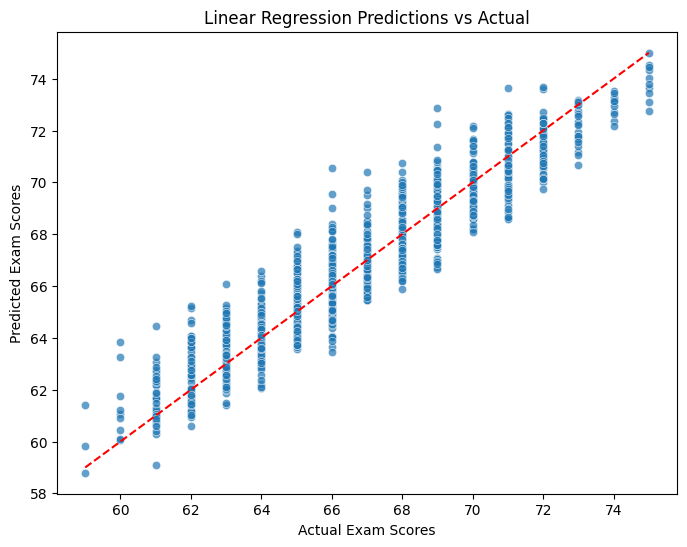

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # perfect prediction line
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Linear Regression Predictions vs Actual")
plt.show()

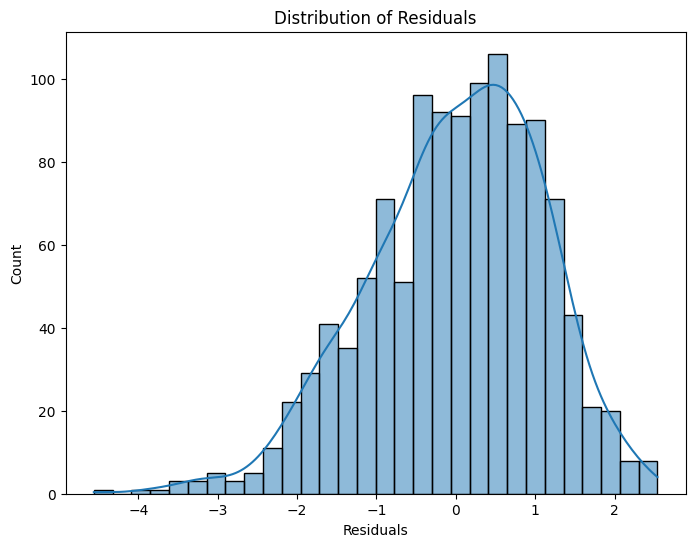

In [26]:
# Residual Plot
plt.figure(figsize=(8,6))
sns.histplot(y_test - y_pred, bins=30, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

In [27]:
with open("exam_score_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)